In [1]:
#We are interested in finding the number plate of the car
import cv2
img=cv2.imread('./kia-seltos-car-number-plate-designs.jpeg',cv2.IMREAD_COLOR)

In [2]:
scalimg = cv2.resize(img, (640,480) )

In [3]:
gray = cv2.cvtColor(scalimg, cv2.COLOR_BGR2GRAY) 

In [4]:
gray = cv2.blur(gray,(3,3)) #Blurring the image

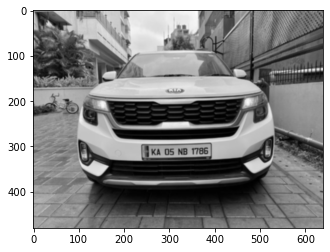

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
#Setting thresholds for edge detection by otsu method
high_thresh, thresh_im = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
lowThresh = 0.5*high_thresh
edges = cv2.Canny(gray, lowThresh, high_thresh) 

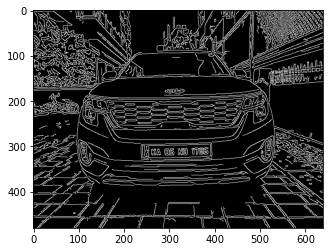

In [7]:
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
plt.show()
import imutils

In [8]:
contours=cv2.findContours(edges.copy(),cv2.RETR_TREE,
                                            cv2.CHAIN_APPROX_SIMPLE)

contours = imutils.grab_contours(contours) 
contours = sorted(contours,key=cv2.contourArea, reverse = True)[:12]  
#Sorting contours by countour area and selecting only the largest 7
#as they would be be relevant
screenCnt = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.01 *cv2.arcLength(contour, True), True) 
    #Finding rectangle contours 
    if len(approx) == 4:
        screenCnt = approx
        break
    

In [9]:
print(screenCnt)
import numpy as np

[[[391 296]]

 [[389 322]]

 [[255 323]]

 [[255 298]]]


In [10]:
#Isolating the region of interest
mask = np.zeros(gray.shape,np.uint8)
detectedimage = cv2.drawContours(mask,[screenCnt],0,255,-1,)
detected_image = cv2.bitwise_and(scalimg,scalimg,mask=mask)

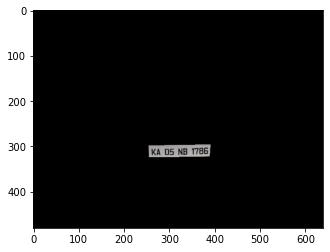

In [11]:
plt.imshow(cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
#getting the dimensions of image for cropping
listx=[]
listy=[]
for i in screenCnt:
    listx.append(i[:,0][0])
    listy.append(i[:,1][0])

croppedimage = scalimg[min(listy):max(listy), min(listx):max(listx)]

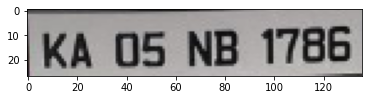

In [13]:
plt.imshow(cv2.cvtColor(croppedimage, cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
cv2.imwrite('./number.png',croppedimage)

True

In [15]:
import os
os.system('tesseract number.png out')

Tesseract Open Source OCR Engine v4.1.1 with Leptonica
Estimating resolution as 185
Error in boxClipToRectangle: box outside rectangle
Error in pixScanForForeground: invalid box


0

In [16]:
os.system('cat out.txt')

KA 05 NB 1786


0